Write python code to select optimal number of neighborhood for KNN using 10-fold CV method and AUC as criterion.

Optimal number of neighbors: 8
Best AUC: 0.9376


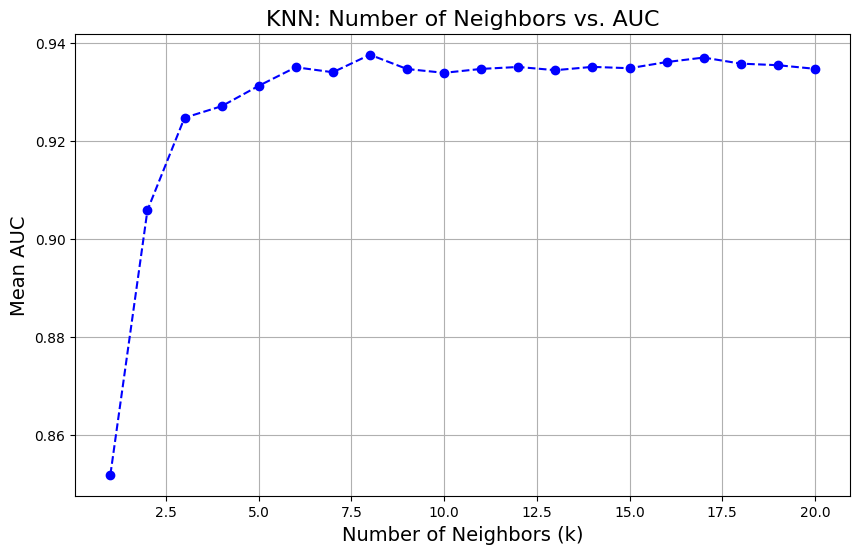

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=369)
#用于生成模拟的分类数据集，参数为：总特征数，有信息特征数和由线性表出的信息数（5）

# Define the range of neighbors to test 1-20
k_values = range(1, 21)

# Initialize variables to store results
mean_auc_scores = []

# 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#在每一折中，目标变量的类别分布与整体数据集保持一致。
#例如，在二分类问题中，如果整个数据集中正类和负类的比例是 70% 和 30%，那么在每一折中，正类和负类的比例也会大致保持 70% 和 30%。

for k in k_values:
    auc_scores = []
    
    for train_index, test_index in kf.split(X, y): #返回索引
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Initialize and fit the KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Predict probabilities for positive class
        y_prob = knn.predict_proba(X_test)[:, 1]
        
        # Compute AUC score
        auc = roc_auc_score(y_test, y_prob)
        auc_scores.append(auc)
    
    # Store the mean AUC for the current k
    mean_auc_scores.append(np.mean(auc_scores))

# Find the optimal number of neighbors
optimal_k = k_values[np.argmax(mean_auc_scores)]
print(f"Optimal number of neighbors: {optimal_k}")
print(f"Best AUC: {max(mean_auc_scores):.4f}")

# Plot AUC vs. number of neighbors
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_auc_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Mean AUC', fontsize=14)
plt.title('KNN: Number of Neighbors vs. AUC', fontsize=16)
plt.grid(True)
plt.show()